Samling af python programmer til de forskellige kapitler om kunstig intelligens.
De enkelte celler kan køres ved at trykke på play i venstre side.

In [ ]:
# skal kun køres én gang og kun hvis I henter filen ned lokale. De er installeret online.
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install pillow;

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# En neuron lineært netværk
Estimeret y-værdi: $\hat{y} = w\cdot x$

Afvigelse: $ \delta = \hat{y}-y$

Loss-funktion $ L = 0.5(w\cdot x-y)^2$

Opdatering af vægte: $w_{ny} = w-\epsilon\cdot \frac{d L}{d w}$

w= 0.5094519394017665
y_hat= 0.40807858068527053


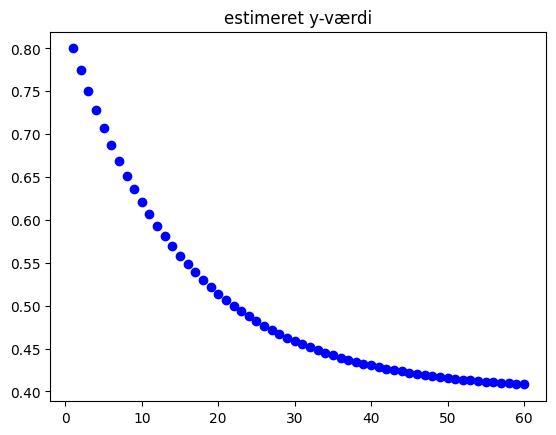

In [3]:
y = 0.4
w = 1
x = 0.8
epsilon = 0.1
i = 0   # i er en tælle-variabel og sørger for at vi kører løkken 60 gange.
while i < 60:
    y_hat = w*x
    d = y_hat-y
    dE = d*x
    w = w-epsilon*dE
    i = i + 1
    plt.scatter(i,y_hat,color='blue')
print('w=',w)
print('y_hat=',y_hat)
plt.title('estimeret y-værdi')
plt.show()

# To neuroner, et output

y1_hat = 0.9990016609444919
y2_hat = 0.0009983390555080172


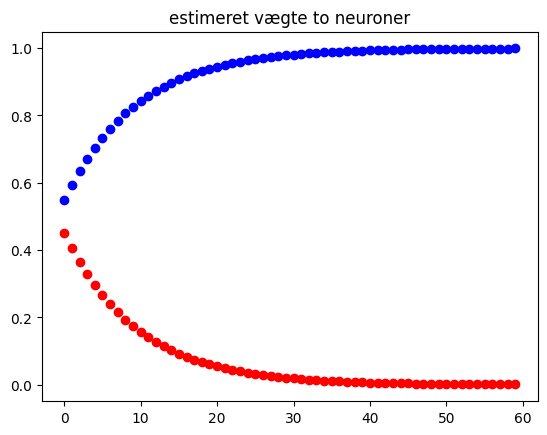

In [4]:
y1 = 1
y2 = 0
a1 = 1
a2 = 0
b1 = 0
b2 = 1
w1 = 0.5
w2 = 0.5
epsilon = 0.1
i = 0
while i < 60:
    y1_hat = w1*a1+w2*a2
    y2_hat = w1*b1+w2*b2
    d1 = y1_hat-y1
    d2 = y2_hat-y2
    dE1 = d1*a1+d2*b1
    dE2 = d1*a2+d2*b2
    w1 = w1-epsilon*dE1
    w2 = w2-epsilon*dE2
    plt.scatter(i,w1,color='blue')
    plt.scatter(i,w2,color='red')
    i += 1
print('y1_hat =',y1_hat)
print('y2_hat =',y2_hat)
plt.title('estimeret vægte to neuroner')
plt.show()

# Ydre produkt, optimering af vægte
Brug af matricer
Output:
$$
\vec{y} = W\cdot \vec{x}
$$
### optimering
Ydre produkt:
$$
\vec{\delta} \otimes \vec{x} = \begin{pmatrix} \delta_1 \\ \delta_2 \end{pmatrix} \begin{pmatrix} x_1 & x_2 \end{pmatrix} = \begin{pmatrix} \delta_1 x_1 & \delta_1 x_2  \\ \delta_2 x_1 & \delta_2 x_2 \end{pmatrix}
$$
Brugt til optimering
$$
\begin{pmatrix}
  w_{11} & w_{12} \\
  w_{21} & w_{22}  
 \end{pmatrix}_{ny} = \begin{pmatrix}
  w_{11} & w_{12} \\
  w_{21} & w_{22}  
 \end{pmatrix} - \epsilon \begin{pmatrix} \delta_1 x_1 & \delta_1 x_2  \\ \delta_2 x_1 & \delta_2 x_2 \end{pmatrix}
$$


In [5]:
import numpy as np
W = np.array([[0.5,0.5],
              [0.5,0.5]]) # startvægtene
W_optimal = np.array([[0.5,0.5],
                      [1.0,-1.0]]) # den optimale efter træning
x = np.array([2,3]) # x-værdier
y = np.dot(W_optimal, x) # y-værdier optimalt
epsilon = 0.1
for i in range(60):
    d2 = np.dot(W, x) - y # fejlen
    W = W - epsilon *  np.outer(d2, x) # opdatering af vægte
print('y estimeret', np.dot(W, x))

y estimeret [ 2.5 -1. ]


# Iris model med data

modellen
$$
W = \begin{pmatrix}
  w_1 & w_2 \\  
  w_3 & w_4 \\
  w_5 & w_6
 \end{pmatrix}, \vec{x} = \begin{pmatrix} x_1\\ x_2 \end{pmatrix}, \vec{y} = \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix}
$$

* Kør programmet og se hvor mange rigtige og forkerte den finder.
* Antallet af iterationer er sat til 100. Prøv at sætte det ned til 10 og tjek hvor god den nu er.
* Gennemgå linje 58-63 hvor netværket bliver trænet.

In [6]:
import numpy as np

x1 = np.array([1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,
               1.7,1.5,1.7,1.5,1.0,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,
               1.3,1.5,1.3,1.5,1.3,1.3,1.3,1.6,1.9,1.4,1.6,1.4,1.5,1.4,4.7,4.5,4.9,4.0,
               4.6,4.5,4.7,3.3,4.6,3.9,3.5,4.2,4.0,4.7,3.6,4.4,4.5,4.1,4.5,3.9,4.8,4.0,
               4.9,4.7,4.3,4.4,4.8,5.0,4.5,3.5,3.8,3.7,3.9,5.1,4.5,4.5,4.7,4.4,4.1,4.0,
               4.4,4.6,4.0,3.3,4.2,4.2,4.2,4.3,3.0,4.1,6.0,5.1,5.9,5.6,5.8,6.6,4.5,6.3,
               5.8,6.1,5.1,5.3,5.5,5.0,5.1,5.3,5.5,6.7,6.9,5.0,5.7,4.9,6.7,4.9,5.7,6.0,
               4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,
               5.7,5.2,5.0,5.2,5.4,5.1])

x2 = np.array([0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,
               0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.1,0.2,
               0.2,0.1,0.2,0.2,0.3,0.3,0.2,0.6,0.4,0.3,0.2,0.2,0.2,0.2,1.4,1.5,1.5,1.3,
               1.5,1.3,1.6,1.0,1.3,1.4,1.0,1.5,1.0,1.4,1.3,1.4,1.5,1.0,1.5,1.1,1.8,1.3,
               1.5,1.2,1.3,1.4,1.4,1.7,1.5,1.0,1.1,1.0,1.2,1.6,1.5,1.6,1.5,1.3,1.3,1.3,
               1.2,1.4,1.2,1.0,1.3,1.2,1.3,1.3,1.1,1.3,2.5,1.9,2.1,1.8,2.2,2.1,1.7,1.8,
               1.8,2.5,2.0,1.9,2.1,2.0,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2.0,2.0,1.8,2.1,1.8,
               1.8,1.8,2.1,1.6,1.9,2.0,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,
               2.5,2.3,1.9,2.0,2.3,1.8])

y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
              0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
              1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,
              2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
              2,2])



rng = np.random.default_rng(seed=42)  # seed=42 hvorfor ikke?
indices = rng.permutation(len(x1))
x1 = x1[indices]
x2 = x2[indices]
y = y[indices]

# Example: printer firste 5 værdier
print("x (petal_length):", x1[:5])
print("x2 (petal_width):", x2[:5])
print("y (class as number):", y[:5])


# Start vægtmatricen (3 klasser x 3 features inkl. bias)
rng2 = np.random.default_rng(42)
W = rng2.normal(0.0, 0.1, size=(3,3))

# Simple softmax
def softmax(v):
    e = np.exp(v)
    return e / np.sum(e)

epsilon = 0.1
iterationer = 100
n = len(x1)

for i in range(iterationer):
    for j in range(n):
        y0 = np.zeros(3)                    # sætter alle tre output til 0
        y0[y[j]] = 1                        # sætter den ønskede til 1 (100%)
        data = np.array([x1[j], x2[j], 1.0])# loader data + bias 1.0
        probs = softmax(W.dot(data))        # laver de estimerede y om til et tal mellem 0-1
        d = probs-y0                        # beregner fejlen
        W = W - epsilon*np.outer(d, data)   # opdaterer wægtene

# Eval på træningsdata
rigtige = 0
forkerte = 0
for i in range(n):
    data = np.array([x1[i], x2[i], 1.0])
    output = np.argmax(np.dot(W, data))
    if output == y[i]:
        rigtige += 1
    else:
        forkerte += 1

print('rigtige: ', rigtige)
print('forkerte: ', forkerte)

x (petal_length): [4.8 3.5 5.6 1.5 4.9]
x2 (petal_width): [1.8 1.  1.4 0.2 1.8]
y (class as number): [1 1 2 0 2]
rigtige:  146
forkerte:  4


# Forudsigelse om person er rask eller syg, baseret på karakteristika, alder, vægt og køn.

In [7]:
print("En person er syg, hvis 1, og en person er rask, hvis 0.\n")

# Input data
alder = 42 # alder i år
vaegt = 75  # vægt i kg
koen = 0 # Kan være 0 eller 1. 0 for mand og 1 for kvinde.

svar = 1. # Syg hvis 1 og rask hvis 0.

input_layer = np.array([alder, vaegt, koen])

# Vægtene
w1 = -0.44
w2 = 0.19
w3 = 8.87
vaegte = np.array([w1, w2, w3])

z = np.dot(input_layer, vaegte)
a = 1 / (1 + np.exp(-z))
print('sandsynlighed for sygdom: ', a)
svar = np.round(a)
if svar == 1:
    print("Personen er syg.")
else:
    print("Personen er rask.")

En person er syg, hvis 1, og en person er rask, hvis 0.

sandsynlighed for sygdom:  0.014343656063488086
Personen er rask.


# Convolutional neural network
I skal selv uploade et billede, tryk på mappe symbolet til venstre. Hvis I vælger jeres eget billede skal I lave om i linje 5 så navnet er det rigtige i stedet for `teeth.png`.

Første celle loader biblioteker og billedet.

Anden celle laver foldningen.

K er foldningsmatricen.

* Prøv at lav om i K.

In [8]:
# importerer bibliotekerne og billedet
from scipy.signal import convolve2d
from PIL import Image

img = Image.open('teeth.png').convert('L') # laver billedet om til gråtoner
B = np.array(img)

FileNotFoundError: [Errno 2] No such file or directory: 'teeth.png'

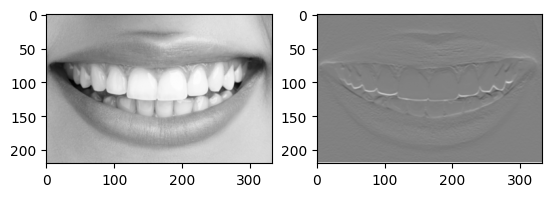

In [ ]:
K = np.array([[-1,-1,-1],
              [0,0,0],
              [1,1,1]])

Z = convolve2d(B,K, mode='same')

plt.subplot(1, 2, 1)
plt.imshow(B,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(Z,cmap='gray')
plt.show()

# Universal approksimator


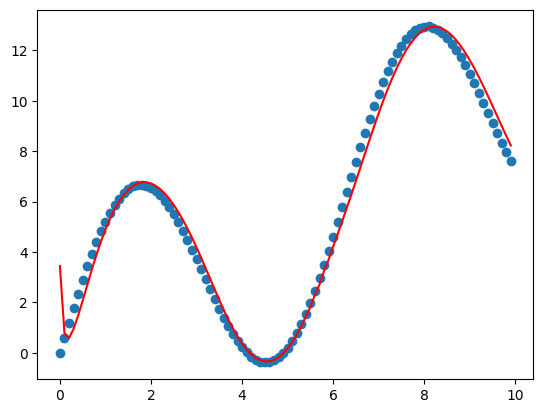

In [9]:
# laver en liste med x og y værdier
x = np.arange(0,10,0.1)
y = 5*np.sin(x)+x


# generer tilfældige startvægte
n = 30 # 10 neuroner i det skjulte lag
np.random.seed(10)
W1 = np.random.rand(n,1)*0.01   # (5,1)
W2 = np.random.rand(1,n)*0.01   # (1,5)

# sigmoid funktionen
def f(x):
    return 1/(1+np.exp(-x))

# den afledte sigmoid
def fm(x):
    s = f(x)
    return s*(1-s)

# løllen som kører 200 gange gennem alle datapunkter
epsilon = 0.1
for epoch in range(200):
    y_list = []
    for j in range(len(x)):
        z1 = W1 * x[j]                           # (5,1)
        h = f(z1)                             # (5,1)
        z2 = W2 @ h                           # (1,1)
        y_hat = z2[0,0]                        # skala forudsigelse
        d2 = y_hat - y[j]                      # loss w1
        d1 = (W2.T * d2) * fm(z1)              # (5,1) loss w2

        # gradient updates (shapes must match weights)
        W1 = W1 - epsilon * (d1 * x[j])          # (5,1) <- (5,1) * scalar
        W2 = W2 - epsilon * (d2 * h.T)        # (1,5) <- scalar * (1,5)
        y_list.append(y_hat)

plt.plot(x,y_list,color='red')
plt.scatter(x,y)
plt.show()
#print(W1)
#print(W2)

# Flypassagerer

Upload `AirPassengers.csv` ved at trykke på mappen.



In [ ]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'])
data.set_index('Month', inplace=True)

y = data['Passengers']
x = np.arange(len(y)).astype(float)
x = x / x.max()

np.random.seed(42)
n = 30 # antal neuroner
W1 = np.random.randn(n,1) * 0.05   # (10,1)
W2 = np.random.randn(1,n) * 0.05   # (1,10)

def f(x):
    x = np.clip(x, -500, 500) # undgår meget store værdier
    return 1.0 / (1.0 + np.exp(-x))

def fm(x):
    s = f(x)
    return s*(1-s)

epsilon = 0.01
for epoch in range(400):
    y_list = []
    for j in range(len(x)):

        z1 = W1 * x[j]                        # (10,1)
        h = f(z1)                             # (10,1)
        z2 = W2 @ h                           # (1,1)
        y_hat = z2[0,0]                       # skalar prediction

        d2 = y_hat - y.iloc[j]                # skalar, finder værdien med ilco
        d1 = (W2.T * d2) * fm(z1)             # (10,1)

        # gradient updates (shapes must match weights)
        W1 = W1 - epsilon * (d1 * x[j])       # (10,1) <- (10,1) * skalar
        W2 = W2 - epsilon * (d2 * h.T)       # (1,10) <- skalar * (1,10)
        y_list.append(y_hat)


plt.figure()
plt.plot(np.arange(len(y_list)), y_list, color='red', label='model')
plt.scatter(np.arange(len(y)), y, label='data'); plt.legend();plt.ylabel('antal passagerer i 1000');plt.xlabel('måneder')
plt.savefig("fly_nn.png",bbox_inches='tight')
plt.show()

NameError: name 'pd' is not defined